In [22]:
class LinearRegression:

    def __init__(self):
        self.weights = 1

    def fit(self, X, y):
        X = np.insert(X.T, 0, 1, axis=0)
        try:
            X_cross = np.matmul(np.linalg.pinv(np.matmul(X, X.T)), X)
            self.weights = np.matmul(X_cross, y)
        except Exception:
            print('Matrix is singular')
        return self.weights

    def predict(self, x, w):
        x = np.insert(x, 0,1, axis=0)
        if type(w) is int:
            w = np.ones(len(x))
        y_pred = np.sign(np.dot(w.T, x))
        return y_pred

    def error(self, X, y):
        X = np.insert(X.T, 0, 1, axis=0)
        summa = 0
        for i in range(len(y)):
            summa += (np.dot(self.weights, X.T[i])-y[i])**2
        return summa/len(y)

    
class LogisticReg:

    def fit(self, X, y, eta=0.01, iteration=2000):
        self.weights = np.ones(shape=X.shape[1])
        for t in range(iteration):
            n = np.random.randint(0,len(X))
            gradient = int(-y[n])*np.dot(2, X[n])*np.exp(int(-y[n])*2*np.dot(self.weights,X[n])) /(1+np.exp(int(-y[n])*2*np.dot(self.weights,X[n]))) 
            self.weights = self.weights - eta*gradient
        return self.weights
    
    def predict(self, x, w):
        return np.sign(np.dot(w,x))
    
    def error(self, g, y):
        sum=0
        error = []
        for i in range(len(g)):
            for j in range(len(y)):
                sum += np.log(1 + np.exp(-2*y[j]*g[i]))
            error.append(sum/len(y))
        return error

In [21]:
import random
import numpy as np
from sklearn.metrics import accuracy_score

class Vfold_validation:

    def __init__(self, X, m=1):
        self.m = m
        self.disjoint_sets = []
        self.fold = int(len(X)/self.m)

    def split(self, X, y):
        if (len(X)) <=self.m:
            self.disjoint_sets.append((X, y))
            return self.disjoint_sets
        else:
            indexes = random.sample(range(len(X)), self.fold)
            disjoint_set_X = X[indexes, :]
            disjoint_set_y = y[indexes]
            X, y = np.delete(X, indexes, axis=0), np.delete(y, indexes)
            self.disjoint_sets.append((disjoint_set_X, disjoint_set_y))
            return self.split(X, y)

    def cross_validation(self, dataset):
        error_lin, error_log = [], []
        i = self.m
        for pair in dataset:
            if i<0:
                break
            X_test, y_test = dataset[0][0], dataset[0][1]
            dataset.remove(dataset[0])
            partition = dataset
            j=0
            X_train, y_train = partition[0][0], partition[0][1]
            for q in dataset[1:]:
                X_train = np.concatenate((X_train, q[j])) 
                y_train = np.concatenate((y_train, q[j+1]))
            y_lin = self.OVA(X_train, X_test, y_train, y_test, LinearRegression)
            error_lin.append(1-accuracy_score(y_test, y_lin))
            y_log = self.OVA(X_train, X_test, y_train, y_test, LogisticReg)
            error_log.append(1-accuracy_score(y_test, y_log))
            dataset.append(pair)
            i -= 1
        return error_lin, error_log
            
    def OVA(self, X_train, X_test, y_train, y_test, regression):
        y_labels = np.arange(10)
        predicted = np.zeros(len(y_test))
        error = []
        for i in y_labels:
            y_train_new = []
            for j in range(len(y_train)):
                if y_train[j]!=i:
                    y_bin=-1
                else:
                    y_bin=1
                y_train_new.append(y_bin)
            model = regression()
            weights = model.fit(X_train, np.array(y_train_new))
            for k in range(len(X_test)):
                if model.predict(X_test[k], weights)==1:
                    y_class = i
                    np.put(predicted, k, y_class)
        return predicted
    

In [57]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

## CV=10

In [24]:
valid = Vfold_validation(X, m=10)
disjoint_set = valid.split(X, y)


In [39]:
errors = valid.cross_validation(disjoint_set)
error_linear, error_logistic = errors[0], errors[1]
print("Error on linear model is {}, when cv=10".format(np.mean(error_linear)))
print("Error on logistic model is {}, when cv=10".format(np.mean(error_logistic)))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sign


Error on linear model is 0.10614525139664802, when cv=10
Error on logistic model is 0.23746644417035478, when cv=10


## CV=5

In [30]:
valid = Vfold_validation(X, m=5)
errors = valid.cross_validation(disjoint_set)
error_linear, error_logistic = errors[0], errors[1]
print("Error on linear model is {}, when cv=5".format(np.mean(error_linear)))
print("Error on logistic model is {}, when cv=5".format(np.mean(error_logistic)))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sign


Error on linear model is 0.1014897579143389, when cv=5
Error on logistic model is 0.2553870710295291, when cv=5


## CV=20

In [38]:
valid = Vfold_validation(X, m=20)
errors = valid.cross_validation(disjoint_set)
error_linear, error_logistic = errors[0], errors[1]
print("Error on linear model is {}, when cv=20".format(np.mean(error_linear)))
print("Error on logistic model is {}, when cv=20".format(np.mean(error_logistic)))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in sign
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply


Error on linear model is 0.11833417978669375, when cv=20
Error on logistic model is 0.2062685917434521, when cv=20


## CV=1

In [140]:
valid = Vfold_validation(X, m=1)
errors = valid.cross_validation(disjoint_set)
error_linear, error_logistic = errors[0], errors[1]
print("Error on linear model is {}, when cv=1".format(np.mean(error_linear)))
print("Error on logistic model is {}, when cv=1".format(np.mean(error_logistic)))

Error on linear model is 0.14525139664804465, when cv=1
Error on logistic model is 0.13966480446927376, when cv=1


# Conclusion on performance of different Kfolds

As CV increases the better result we get in error, but it was not true for $CV=1$. I think, that is because digits dataset is estimated very well with having more train_size rather than tes_size. For $CV=1$ case LogisticRegression performs a little bit accurately, while for other cases LinearRegression is the best model for selection.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

param_grid = {'C': [0.01]}
grid = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), param_grid=param_grid, cv=10)
grid.fit(X, y)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={'C': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [74]:
scores = grid.best_score_
scores

0.9376739009460211

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid=param_grid, cv=10)
grid.fit(X, y)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
scores = grid.best_score_
scores

0.5345505204367018

## Comparison

As you can see here best mean prediction accuracy is 0.938 for LogisticRegression, whereas it is 0.535 for LinearRegression. This means that LogisticRegression models better performed than LinearRegression. However, this result highly differs from my implementation of Linear and Logistic Regressions. There LinearRegression performed better, since, I think, logistic Regression was implemented under the prediction function based on sign function, while in the built-in function of LogisticRegression in sklearn library, tetta function using probability is used. 

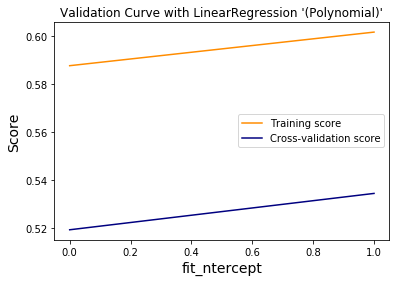

In [64]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# def PolynomialRegression(degree=2, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))
# import matplotlib.pyplot as plt

fit_intercept = [True, False]
train_scores, test_scores = validation_curve(LinearRegression(), X, y,'fit_intercept', fit_intercept, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LinearRegression '(Polynomial)'")
plt.xlabel(r"fit_intercept", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.plot(fit_intercept, train_scores_mean, label="Training score", color="darkorange")
plt.plot(fit_intercept, test_scores_mean, label="Cross-validation score", color="navy")
plt.legend(loc="best")
plt.show()


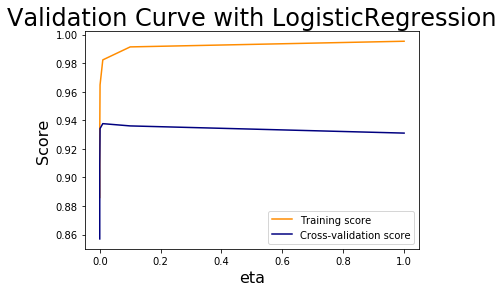

In [56]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

param_range = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
train_scores, test_scores = validation_curve(LogisticRegression(multi_class='auto', solver='liblinear'), X, y,'C', param_range=param_range, cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with LogisticRegression", fontsize=24)
plt.xlabel(r"eta", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="navy")
plt.legend(loc="best")
plt.show()


In LogisticRegression Validation curve you can see that training score is higher than validation score after a little shift from 0.
From the LinearRegression curve it is clear that LinearRegression overfits the data. While, in LogisticRegression the variance between training score and validation score is small almost 0.04, and the bias is low because the training score is high. This means that validation dataset may better work for model to predict the outcome than the training dataset. 
The best model for digits dataset among these two would be logisticRegression. 